In [2]:
import pandas as pd
from ast import literal_eval
from konlpy.tag import Hannanum
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random
from nltk.corpus import stopwords

In [3]:
stop_words = []

with open('stopwords-ko.txt', 'r', encoding = 'utf8') as file:
    for line in file:
        line = line.replace('\n', '')
        stop_words.append(line)

In [4]:
text = ''

df = pd.read_csv('genius_giriboy_lyrics.csv')
for korean in df['kor']:
    korean = literal_eval(korean)
    for line in korean:
        text += line + '\n'

def get_nouns(text):
    h = Hannanum()
    all_nouns = h.nouns(text)
    
    selected_nouns = []
    all_text = []
    stop_words.extend(['내','니','우','수','거','보','화','데','마','두','안','지','넌','난'])
    for noun in all_nouns:
        if noun not in stop_words:
            selected_nouns.append(noun)
            
    nouns = Counter(selected_nouns)
    
    return nouns

def get_all_and_one_time_words(text):
    all_text = [word for word in text.split()]
    all_text_cleaned = []
    for word in all_text:
        no_stop = True
        for stop_word in stop_words:
            index = word.find(stop_word)
            if index != -1:
                no_stop = False
        if no_stop == True:
            all_text_cleaned.append(word)
            
    all_text_cleaned = Counter(all_text_cleaned)
    least_common = all_text_cleaned.most_common()[:-1000-1:-1]
    one_time_words = [key for key, _ in least_common] 
        
    return [all_text_cleaned, one_time_words]
            
nouns = get_nouns(text)
print(sum(nouns.values()))
all_lyrics = get_all_and_one_time_words(text)

3725


In [67]:
img = Image.open('giriboy_mask_profile.png')
new_img = img.resize((850,800))
new_img.save('giriboy_resized.png')

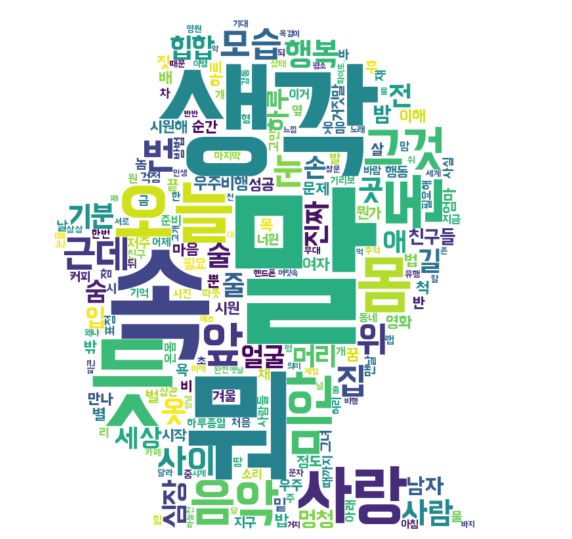

In [189]:
font_path = r'C:\Users\andre\AppData\Local\Microsoft\Windows\Fonts\BM-HANNA.ttf'
giriboy_mask = np.array(Image.open('giriboy_resized.png'))
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white', mask = giriboy_mask)
wordcloud = wordcloud.generate_from_frequencies(nouns)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation ='bilinear')
plt.axis('off')
plt.show()
fig.savefig('nouns.png')

In [8]:
long_one_time_words =  []
for word in all_lyrics[1]:
    if len(word) > 3:
        long_one_time_words.append(word)
        
long_five_sample = random.sample(long_one_time_words, 10)

longest_twenty = reversed(sorted(all_lyrics[1], key = len)[-20:])
longest_twenty = Counter(longest_twenty)
print(longest_twenty)

Counter({'뻐끔뻐끔뻐끔뻐끔': 1, '#중독되는커피': 1, '주고받았다며': 1, '#드래곤볼': 1, '심심해서도': 1, '선전포고해': 1, '빠져버려도': 1, '질러버리고': 1, '멍청함으론': 1, '질려버려도': 1, '걸린다면서': 1, '실존한다고': 1, '처리돼있는': 1, '후려갈길래': 1, '쪼개서라도': 1, '싫기전엔': 1, '되뇌인다': 1, '편해져서': 1, '버린다면': 1, '차근차근': 1})


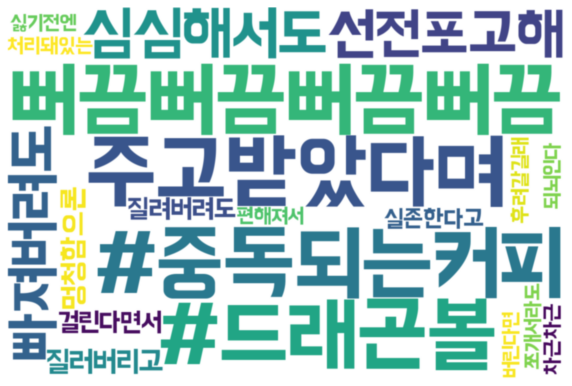

In [184]:
wordcloud = WordCloud(font_path = font_path, width = 1200, height = 800, background_color = 'white')
wordcloud = wordcloud.generate_from_frequencies(longest_twenty)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig('longest_twenty.png')

In [7]:
eng_text = ''

df = pd.read_csv('genius_giriboy_lyrics.csv')
for english in df['eng']:
    english = literal_eval(english)
    for line in english:
        line = line.replace(',','')
        eng_text += line + '\n'
        
stopwords = set(STOPWORDS)
nltk_stopwords = stopwords.words('english')
stopwords.update(nltk_stopwords)
stopwords.add("You're")

def get_words(eng_text):
    all_text = [word for word in eng_text.split()]
    words = []
    for word in all_text:
        if word not in stopwords:
            words.append(word)
           
    words = Counter(words)
    least_common = words.most_common()[:-200-1:-1]
    one_time_words = [key for key, _ in least_common] 
   
    return [words, one_time_words]

english = get_words(eng_text)
print(sum(english[0].values()))

566


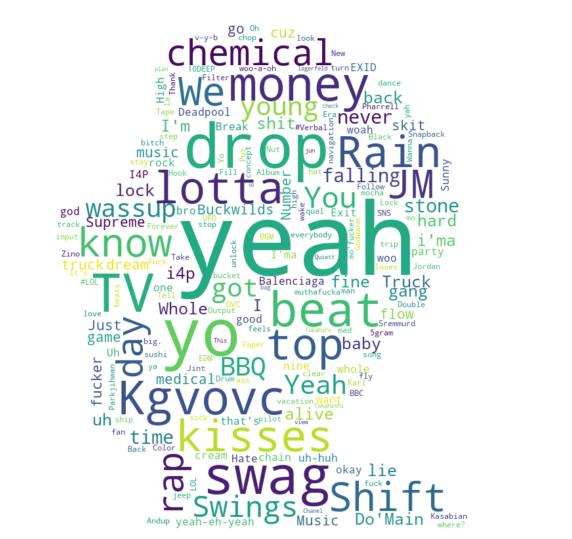

In [7]:
giriboy_mask = np.array(Image.open('word clouds/giriboy_resized.png'))
wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800, background_color = 'white', mask = giriboy_mask)
wordcloud = wordcloud.generate_from_frequencies(english[0])

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig('english.png')

In [8]:
longest_forty = reversed(sorted(english[1], key = len)[-42:])
longest_forty = list(longest_forty)

longest_forty.remove('motherfucker')
longest_forty.remove("mo'fucker")
    
longest_forty = Counter(longest_forty)
print(longest_forty)

Counter({'Northbutsouth': 1, 'Parkjihwan': 1, 'navigation': 1, 'everybody': 1, 'lagerfeld': 1, 'Takahashi': 1, 'Hypebeast': 1, 'stainless': 1, 'biography': 1, 'Collector': 1, 'Snapback': 1, 'woo-a-oh': 1, 'Sremmurd': 1, 'Takahiro': 1, 'Cameroon': 1, 'Goretexx': 1, 'Kendrick': 1, '#Verbal': 1, 'Forever': 1, 'Goddanm': 1, 'concept': 1, 'ACRONYM': 1, 'G-R-boy': 1, 'Acronym': 1, 'stylish': 1, 'Hipster': 1, 'trouble': 1, 'Houston': 1, 'miracle': 1, 'weekend': 1, 'problem': 1, 'hip-hop': 1, 'Playing': 1, 'Follow': 1, 'bucket': 1, 'unlock': 1, 'Double': 1, 'Output': 1, 'Filter': 1, 'Chanel': 1})


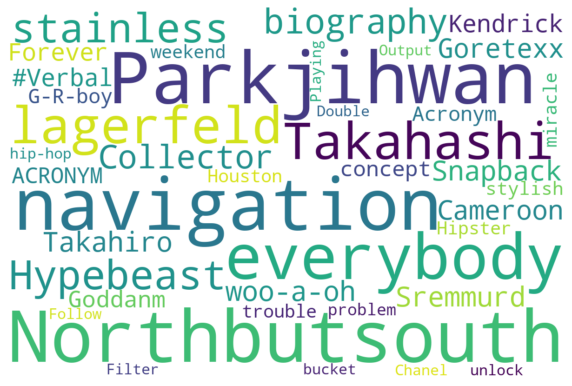

In [75]:
wordcloud = WordCloud(width = 1200, height = 800, background_color = 'white')
wordcloud = wordcloud.generate_from_frequencies(longest_forty)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig('longest_forty_eng.png')

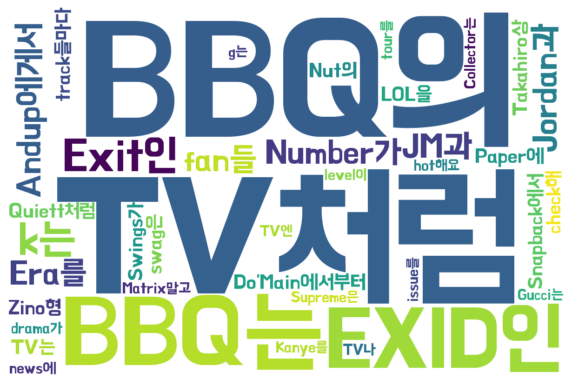

In [8]:
eng_kor_text = ''

df = pd.read_csv('genius_giriboy_lyrics.csv')
for eng_kor in df['eng-kor']:
    eng_kor = literal_eval(eng_kor)
    for line in eng_kor:
        line = line.replace(',','')
        eng_kor_text += line + '\n'

def get_words(eng_kor_text):
    all_text = [word for word in eng_kor_text.split()]  
    words = Counter(all_text)
        
    return words

all_words = get_words(eng_kor_text)
font_path = r'C:\Users\andre\AppData\Local\Microsoft\Windows\Fonts\BM-HANNA.ttf'
wordcloud = WordCloud(font_path = font_path, width = 1200, height = 800, background_color = 'white')
wordcloud = wordcloud.generate_from_frequencies(all_words)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig('all_eng_kor.png')

In [9]:
print(all_words)

Counter({'TV처럼': 2, 'BBQ의': 2, 'BBQ는': 2, 'EXID인': 2, 'Exit인': 2, 'k는': 2, 'Number가': 1, 'Jordan과': 1, 'Andup에게서': 1, 'Era를': 1, 'JM과': 1, 'fan들': 1, "Do'Main에서부터": 1, 'Snapback에서': 1, 'Swings가': 1, 'LOL을': 1, 'Paper에': 1, 'track들마다': 1, 'Nut의': 1, 'Zino형': 1, 'TV는': 1, 'swag은': 1, 'Takahiro상': 1, 'check해': 1, 'Quiett처럼': 1, 'Supreme은': 1, 'level이': 1, 'Matrix말고': 1, 'issue를': 1, 'news에': 1, 'tour를': 1, 'g는': 1, 'TV나': 1, 'Gucci는': 1, 'Kanye를': 1, 'hot해요': 1, 'Collector는': 1, 'TV엔': 1, 'drama가': 1})


In [10]:
print(len(all_words))

39
